## Customer Churn Prediction

### Context

A DTH (Direct to Home) service provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation, Because one account can have multiple customers. Hence by losing one account, the company might be losing more than one customer. 
The objective of the problem statement is to predict the customers who are going to churn based on the usage and other demographic factors and provide recommendations to the company to minimize the churn.


### Objective

To identify the customers who are going to churn DHT service based on the usage of the service provider and other demographic factors, and provide recommendations to the company to minimize the churn rate of customers.

### Business/Social Opportunity

The customers are a fundamental part of an DHT's growth, given that, their satisfaction play as an important role in the pursuit of service's successful. An effective churn prediction model will enable the company to identify potential churn customers and dissuade them from leaving by improving the offers tailored to them specifically. Also, when this model is proven and tested effectively, the Direct-To-Home service provider company can sell this proprietary model to other companies facing same challenge. This will further boost the company's revenue.

### Data Report

#### Data Collection

- The data was collected on various accounts using their account IDs to know if they were still operating or if they had been closed or abandoned (churn).

- The campaign survey was taken at different categories of cities in different locations ranked by city tiers.

- Over the course of 12 months, the number of times customers tied to an account contacted customer care was recorded.

- Details tied to each account ID were collected such as number of users tied to each account, gender and marital status of the primary customer, account segment on the basis of spend, average monthly revenue over last 12 months, prefered login device of customer etc.

#### Visual Inspection of Data

- The data has 11260 rows and 19 columns

- Each Account ID is unique without repetition

- There are many null values with empty spaces, while there are many special character such as @, +, #,  &&&&, regular + instead of regular plus, F instead of Female which have to be replaced with NaN & then missing value imputation to be performed.

#### Understanding of attributes

**Account ID** - Account unique identifier.

**Churn** - Account churn flag.

**Tenure** - Tenure of account.

**City Tier** - Tier of primary customer's city.

**CC Contacted LY** - How many times all the customers of the account has contacted customer care in last 12 months.

**Payment** - Preferred Payment mode of the customers in the account.

**Gender** - Gender of the primary customer of the account.

**Service Score** - Satisfaction score given by customers of the account on service provided by company.

**Account user count** - Number of customers tagged with this account.

**Account segment** - Account segmentation on the basis of spend.

**CC Agent Score** - Satisfaction score given by customers of the account on customer care service provided by company.

**Marital Status** - Marital status of the primary customer of the account.

**Rev per month** - Monthly average revenue generated by account in last 12 months.

**Complain ly** - Any complaints has been raised by account in last 12 months.

**Rev growth yoy** - Revenue growth percentage of the account (last 12 months vs last 24 to 13 month).

**Coupon used for payment** - How many times customers have used coupons to do the payment in last 12 months.

**Day Since CC connect** - Number of days since no customers in the account has contacted the customer care.

**Cashback** - Monthly average cashback generated by account in last 12 months.

**Login device** - Preferred login device of the customers in the account.

### Importing Required Libraries

In [1]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.cluster import KMeans

# Library to split data 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
import scipy.stats as stats

In [2]:
!pip install xgboost==1.0.1

In [3]:
from xgboost import XGBClassifier

### Read  data & viewing top 5 observations 

In [4]:
#Reading the Customer Churn data file 
churn = pd.read_excel('Customer Churn Data.xlsx')

In [5]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [6]:
## Check dimension of dataset
churn.shape

(11260, 19)

In [7]:
## Check for datatype
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

#### Observations

- We have 11,260 observations for 4 columns.

- We expect missing values for 15 columns.

- We identified 7 variables which have numerical values at first look but those are set as categorical variables (Tenure, Account user count, Rev per month, Rev growth yoy, Coupon used for payment, Day Since CC connect and Cashback).

In [8]:
## Check for summary of data
churn.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


#### Observations

- It seems that there are 16.8% of customer account churn.

- The City Tier, Complain ly and CC Contacted LY is looks slightly right-skewed.

- The Service Score and CC Agent score seems to have variability in all the posibles values.


### Check for Duplicates

In [9]:
churn.duplicated().sum()

0

There are no duplicate values in the dataset

### Initial Exploratory Data Analysis

In [10]:
def multipleBoxplotNumLoop(all_col,DS):
    plt.figure(figsize=(15, 50))
    for i in range(len(all_col)):
            plt.subplot(18, 3, i + 1)
            q1 = DS[all_col[i]].quantile(.25) # calculate the Q1 wich represents the 25%
            q3 = DS[all_col[i]].quantile(.75) # calculate the Q1 wich represents the 75%
            mean = DS[all_col[i]].mean()
            median = DS[all_col[i]].median()
            mode = DS[all_col[i]].mode()[0]
            
            sns.boxplot(DS[all_col[i]],orient='v',color='#4DA3D5',showmeans=True,
                        meanprops={"marker": "D", "markerfacecolor":"firebrick",
                                   "markeredgecolor": "black","markersize": "5"})
            plt.text(x=q1,y=0,s=f'{q1:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))
            plt.text(x=q3,y=0,s=f'{q3:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))    
            plt.tight_layout()
            plt.title(all_col[i], fontsize=15)
    plt.show()

def multipleDspltNumLoop(all_col,DS):
    plt.figure(figsize=(15, 50))
    for i in range(len(all_col)):
        plt.subplot(18, 3, i + 1)
        q1 = DS[all_col[i]].quantile(.25) # calculate the Q1 wich represents the 25%
        q3 = DS[all_col[i]].quantile(.75) # calculate the Q1 wich represents the 75%
        mean = DS[all_col[i]].mean()
        median = DS[all_col[i]].median()
        mode = DS[all_col[i]].mode()[0]
        
        z = sns.distplot(DS[all_col[i]], hist=False,color='#282A89') #Create the frequency plot (hist=false) 
        kde_x, kde_y = z.lines[0].get_data() #get the first line cointained from the Axes object
        
        plt.axvline(mean, color='green', linewidth=2,label='Mean'); #Add the mean to the frequency plot 
        plt.axvline(median, color='#FFCD00', linestyle=':', linewidth=2,label='Median'); #Add the median to the frequency plot 
        plt.axvline(mode, color='red', linestyle='-.', linewidth=2,label='Mode'); #Add the mode to the frequency plot 
        plt.legend()  
        plt.axvline(x=q1,color='#8009A9') #Add the Q1 to the frequency plot 
        plt.axvline(x=q3,color='#8009A9') #Add the Q3 to the frequency plot 
        #We add the labels for the mean to the frequency plot
        plt.text(x=mean,y=0,s=f'{mean:.2f}',ha='center',va='center',color='black',
                 weight='semibold',bbox=dict(facecolor='#C6E0B4'))
        
        #We color/fill the zone under Q1 value and over Q3 value in the frequency plot 
        #We use interpolate because we have two curves crossing each other and 
        #where to defined some horizontal regions from being filled
        plt.fill_between(kde_x, kde_y, where=(kde_x<q1) | (kde_x>q3) , interpolate=True, color='#E2C0F7')
        
        plt.tight_layout()
        plt.title(all_col[i], fontsize=15)
    plt.show()

### Univariate Analysis

#### Numeric variables

In [11]:
all_col = churn.select_dtypes(include=np.number).columns.tolist()
all_col.remove('AccountID')

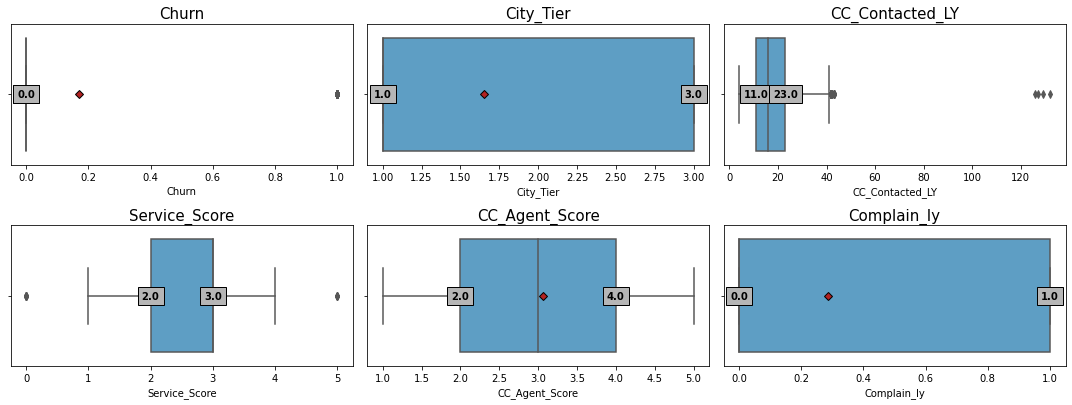

In [12]:
multipleBoxplotNumLoop(all_col,churn)

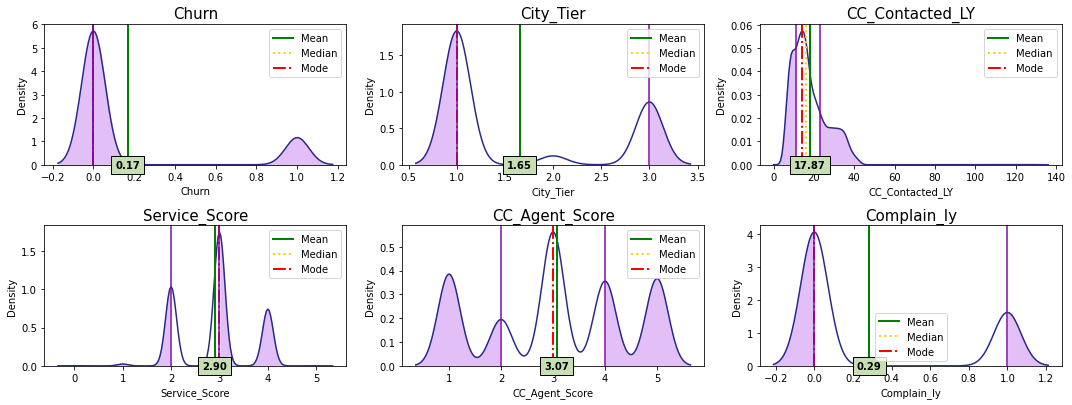

In [13]:
multipleDspltNumLoop(all_col,churn)

#### Observations

- There are only a few customer account churn in the dataset

- The most popular city tier is 1.

- The times that all the customers of the account has contacted customer care in last 12 months go from 17 to 18.

- There are extreme values wrt customer contacted customer care with in a year.

- The 50% of service score goes from 2 to 3 with an average close to 3.

- The Average of satisfaction score given by customers of the account on customer care service is 3 and the 50% of Age go from 2 to 4 years old.

- There are only a few customers with complaints than satisfied customers.

### Categorical Variables

#### Payment variable

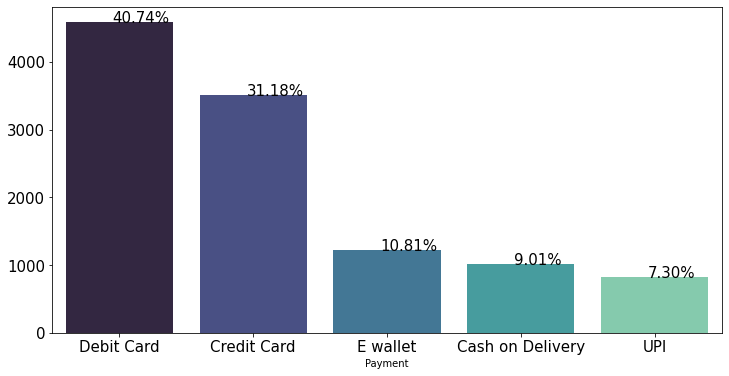

In [14]:
ctmCrhSd = churn['Payment']
plt.figure(figsize=(12,6))
ax = sns.countplot(ctmCrhSd,palette='mako',order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observation

Debit Card is the most used payment mode in DTH service provider followed by a Credit Card.

#### Gender Variable

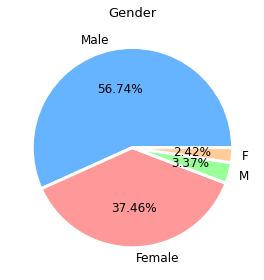

In [15]:
cls = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
clmPlt ='Gender'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 12},colors = cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=13);
plt.ylabel("")
plt.tight_layout()
plt.show()


#### Observation

- We can observe that in total account holding customers 40.83% are female and 59.16% customers are male.
- We also have to change F to Female and M to Male to keep them uniform


#### Account segment

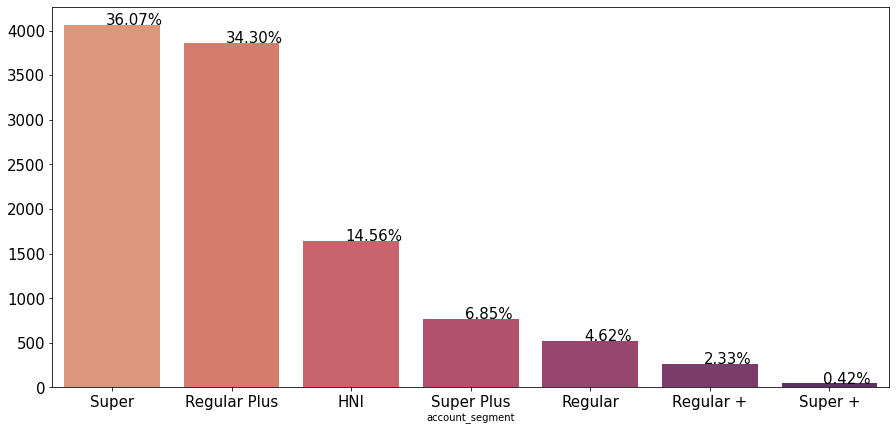

In [16]:
ctmCrhSd = churn['account_segment']
plt.figure(figsize=(15,7))
ax = sns.countplot(ctmCrhSd,palette='flare',order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observation

- We can see that there are some typos in the names of the accounts such as Super Plus and Super +
- The most popular account segment in DTH is Regular plus (36.63) followed by Super.

#### Marital Status

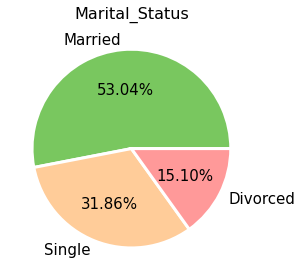

In [17]:
cls = ['#79c75f','#ffcc99','#ff9999','#ffcc99']
clmPlt ='Marital_Status'
churn[clmPlt].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 15}, colors=cls,
                                       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
plt.title(clmPlt, fontsize=16);
plt.ylabel("")
plt.tight_layout()
plt.show()

#### Obsrevation

There are more (53.04%) married customers followed by single and divorced.

#### Login device

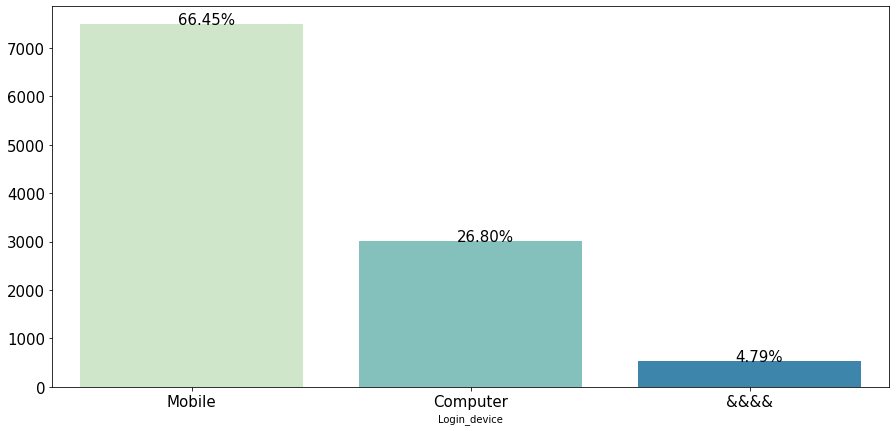

In [18]:
ctmCrhSd = churn['Login_device']
plt.figure(figsize=(15,7))
ax = sns.countplot(ctmCrhSd,palette='GnBu',order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y)  , size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- There are a sequence of invalid characters (&&&&) as a value for login device.

- The Mobile is the most used device as compared to Computer

### Note

The following variables are grouped into categorical datatype. Basically they should be considered as numerical but because of some special character present in the variables they are falling under categorical data.

Tenure

Account user count

Rev per month

Rev growth yoy

Coupon used for payment

Day Since CC connect

Cashback

We will conduct EDA considering as categoriacal data for time being, in further steps we will convert & impute special characters. 

#### Tenure

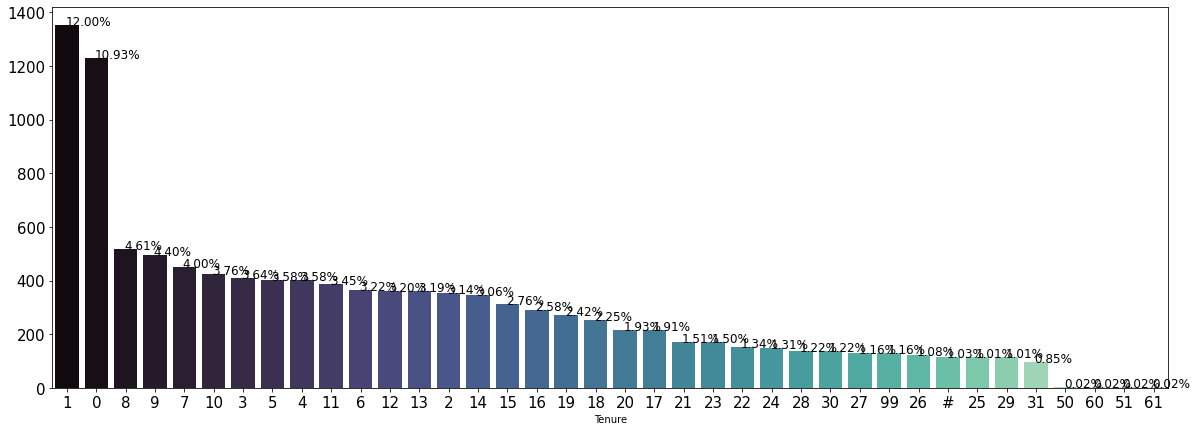

In [19]:
ctmCrhSd = churn['Tenure']
plt.figure(figsize=(20,7))
ax = sns.countplot(ctmCrhSd,palette='mako',order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- There is a typo (#).

- The most popular value for the Tenure of account is 1 slightly followed by 0.

#### Account user count

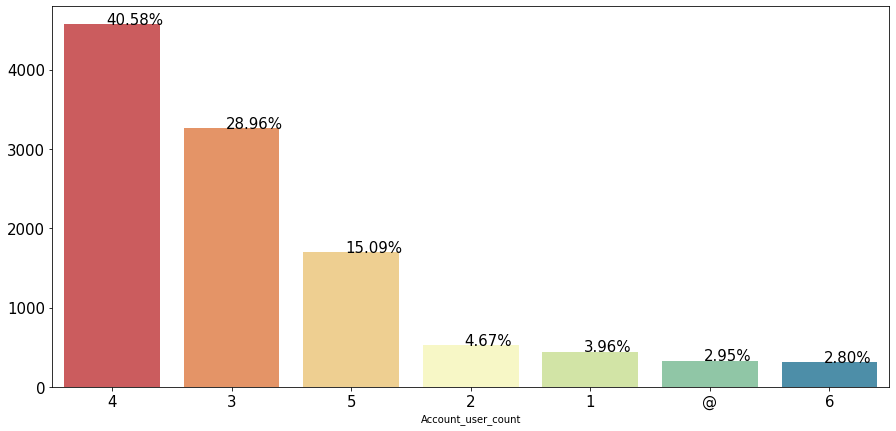

In [20]:
ctmCrhSd = churn['Account_user_count']
plt.figure(figsize=(15,7))
ax = sns.countplot(ctmCrhSd,palette='Spectral',order=ctmCrhSd.value_counts().index);
total = len(ctmCrhSd)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage

plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- There is a typo (@).

- The large number of customers tagged with the account is 4 followed by 3 with a 11.62% less.

### Bivariate Analysis

#### Correlation plot

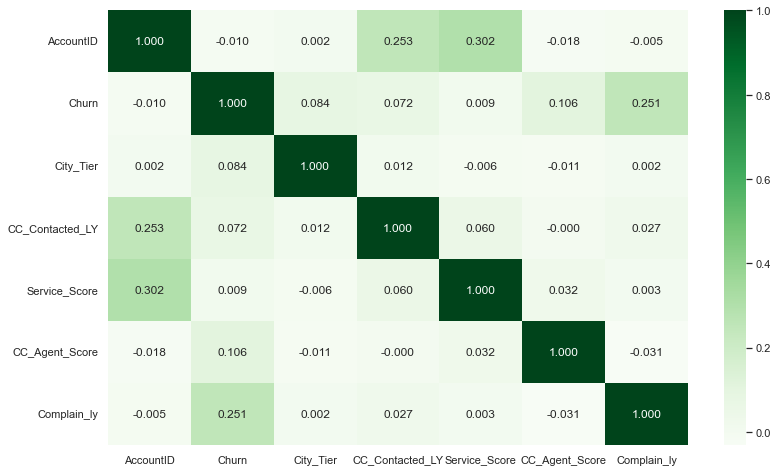

In [21]:
plt.figure(figsize=(13,8))
sns.set(font_scale=1)
sns.heatmap(churn.corr(), cmap="Greens" ,annot=True, fmt='.3f');

#### Observation

- There is a correlation between customers' account churn with the complaints raised by account in the last 12 months.

- It seems that many accounts have a correlation with the times that all the customers of the account has contacted customer care and satisfaction score given by customers of the account.

#### Account churn vs Complaints

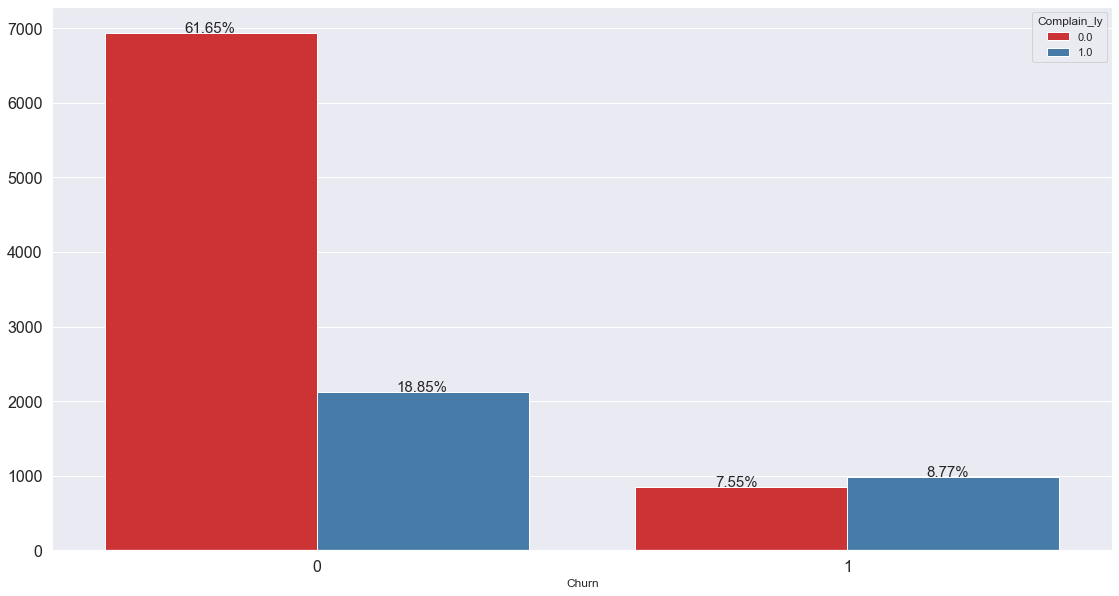

In [22]:
plt.figure(figsize=(19,10))
ax = sns.countplot(hue='Complain_ly', x='Churn', data=churn,palette='Set1');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations

- There are a large numbers of accounts which are not churning and have no complaints, however there are a 18.85% who are churning and have a complaint.

- There are customers who have decided to churn (7.55%) and have not raised any complaints which means they decided to leave the service before raising a complaint, however there are a 8.77% who decided to churn and have raised a complaint.

#### Account churn vs Payment

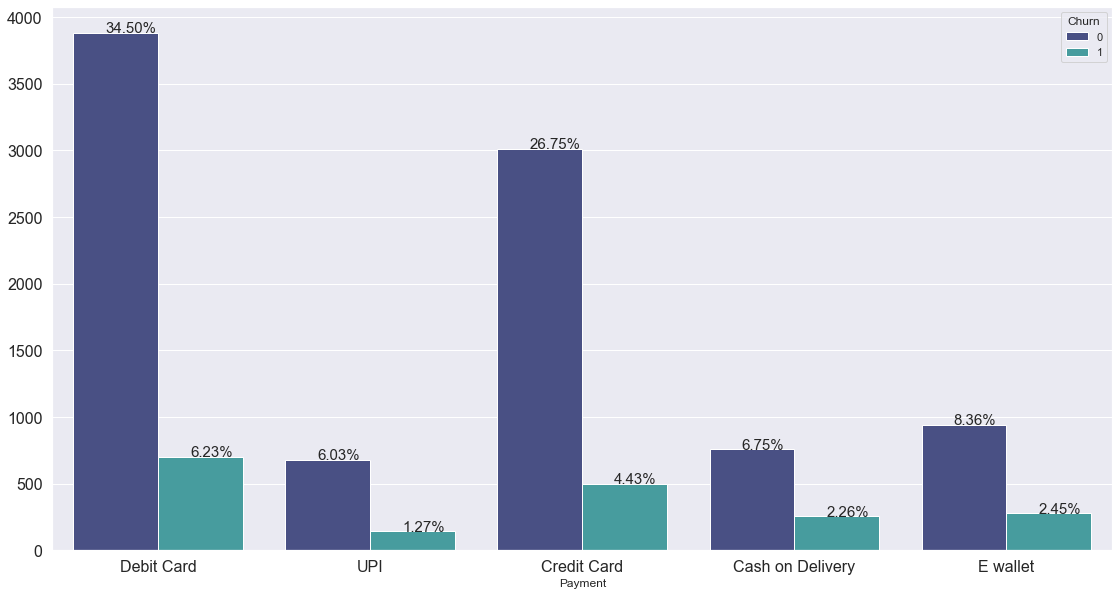

In [23]:
plt.figure(figsize=(19,10))
ax = sns.countplot(hue="Churn", x='Payment', data=churn,palette='mako');
total = len(churn)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage
plt.ylabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### Observations

- Debit Card and Credit Card are the most popular payment mode for payment.

- UPI is the less popular payment mode for the customers who decided to churn.

- E wallet is most popular than Cash on Delivery and UPI for customers who decided not to churn.

#### You can do bivariate analysis for other variableas also like, Account churn vs Account segment, Payment mode vs Login device etc.

### Multvariate Analysis

#### Customer care Contacted vs Service score wrt Complaints with in a year

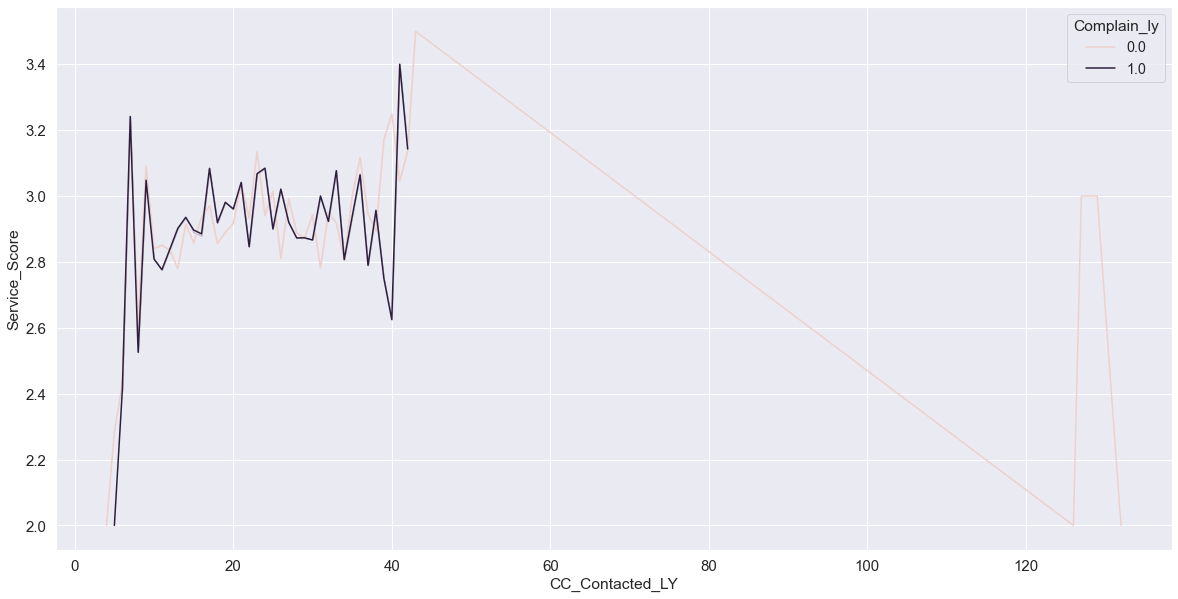

In [24]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.3)
sns.lineplot(y="Service_Score", x="CC_Contacted_LY", ci=0, data=churn, hue='Complain_ly')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- The times when all the customers contacted customer care to raise a complaint, the satisfaction score on service provided is minimum 2 and maximum is 3.4, and contacted customer care with in a year ranges between ~5 to ~40 times.

- The times when all the customers contacted customer care to not raise a complaint, the satisfaction score on service provided is minimum 2 and the maximum 3.5, contacted customer care with in a year ranges range between ~5 to ~130 times.

- The most common times when all the customers contacted customer care for raising & not raising complaint is between to ~15 to ~40 times with a satisfaction score on service provided between to ~2.8 to ~3.1.

#### Satisfaction score on services provided vs Payment mode wrt complaints

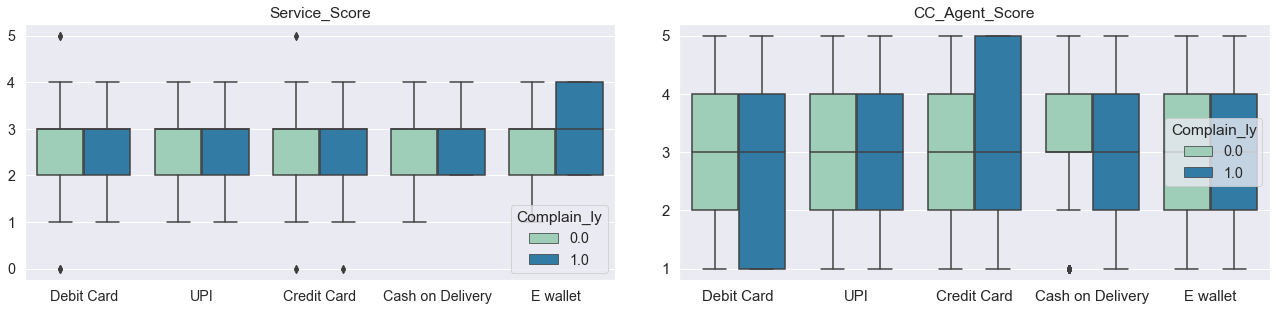

In [25]:
cols = churn[['Service_Score','CC_Agent_Score']].columns.tolist()
plt.figure(figsize=(18, 13))
sns.set(font_scale=1.3)
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(churn["Payment"], churn[variable],hue=churn['Complain_ly'],palette='YlGnBu')
    plt.tight_layout()
    plt.ylabel("")
    plt.xlabel("")
    plt.title(variable)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations

- The satisfaction score on service provided by customers for the E wallet when a customer raised a complaint is between 2 to 4 for the others payments mode is between 2 to 3.

- The satisfaction score on service provided by customers for all the payments mode when a customer did not raise a complaint is between 2 to 3.

- The satisfaction score on customer care service provided by customers when a customer raised a complaint is between 2 to 4 for UPI, Cash on delivery and E wallet, between 2 to 5 for Credit card and between 1 to 4 for Debit card.

- The satisfaction score on customer care service provided by customers for the Cash on delivery when a customer did not raise a complaint is between 3 to 4 for the others payments mode is between 2 to 3.

### Data Pre-Processing

#### Removal of unwanted variable for further analysis

In [26]:
churn.drop(['AccountID'],axis=1,inplace=True)

In [27]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


#### Checking for number of unique classes in each variable 

In [28]:
churn.nunique()

Churn                         2
Tenure                       38
City_Tier                     3
CC_Contacted_LY              44
Payment                       5
Gender                        4
Service_Score                 6
Account_user_count            7
account_segment               7
CC_Agent_Score                5
Marital_Status                3
rev_per_month                59
Complain_ly                   2
rev_growth_yoy               20
coupon_used_for_payment      20
Day_Since_CC_connect         24
cashback                   5693
Login_device                  3
dtype: int64

In [29]:
for column in churn.columns:
    print(churn[column].value_counts())
    print('-'*50)

0    9364
1    1896
Name: Churn, dtype: int64
--------------------------------------------------
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64
--------------------------------------------------
1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
--------------------------------------------------
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
28.0

#### Checking for missing values in the data

In [30]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

#### Replacing special characters with NaN

In [31]:
for feature in churn.columns:
    churn[feature] = churn[feature].replace('+',np.NaN).replace('#',np.NaN).replace('@',np.NaN).replace('&&&&',np.NaN).replace('$',np.NaN).replace('*',np.NaN).replace('Super +','Super Plus').replace('Regular +','Regular Plus').replace('F','Female').replace('M','Male')

In [32]:
churn.nunique()

Churn                         2
Tenure                       37
City_Tier                     3
CC_Contacted_LY              44
Payment                       5
Gender                        2
Service_Score                 6
Account_user_count            6
account_segment               5
CC_Agent_Score                5
Marital_Status                3
rev_per_month                58
Complain_ly                   2
rev_growth_yoy               19
coupon_used_for_payment      17
Day_Since_CC_connect         23
cashback                   5692
Login_device                  2
dtype: int64

In [33]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [34]:
 #lets type-cast the data types that need to be typecasted into their respective natural datatypes

churn['Tenure'] = churn['Tenure'].astype('float64')

churn['Payment'] = churn['Payment'].astype('category')
churn['Gender'] = churn['Gender'].astype('category')
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')
churn['account_segment'] = churn['account_segment'].astype('category')
churn['Marital_Status'] = churn['Marital_Status'].astype('category')
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('float64')
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')
churn['cashback'] = churn['cashback'].astype('float64')
churn['Login_device'] = churn['Login_device'].astype('category')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11260 non-null  int64   
 1   Tenure                   11042 non-null  float64 
 2   City_Tier                11148 non-null  float64 
 3   CC_Contacted_LY          11158 non-null  float64 
 4   Payment                  11151 non-null  category
 5   Gender                   11152 non-null  category
 6   Service_Score            11162 non-null  float64 
 7   Account_user_count       10816 non-null  float64 
 8   account_segment          11163 non-null  category
 9   CC_Agent_Score           11144 non-null  float64 
 10  Marital_Status           11048 non-null  category
 11  rev_per_month            10469 non-null  float64 
 12  Complain_ly              10903 non-null  float64 
 13  rev_growth_yoy           11257 non-null  float64 
 14  coupon

### Outlier Treatment

In [35]:
numerical_columns = churn.select_dtypes(include=np.number).columns.to_list()
numerical_columns.remove('Churn')

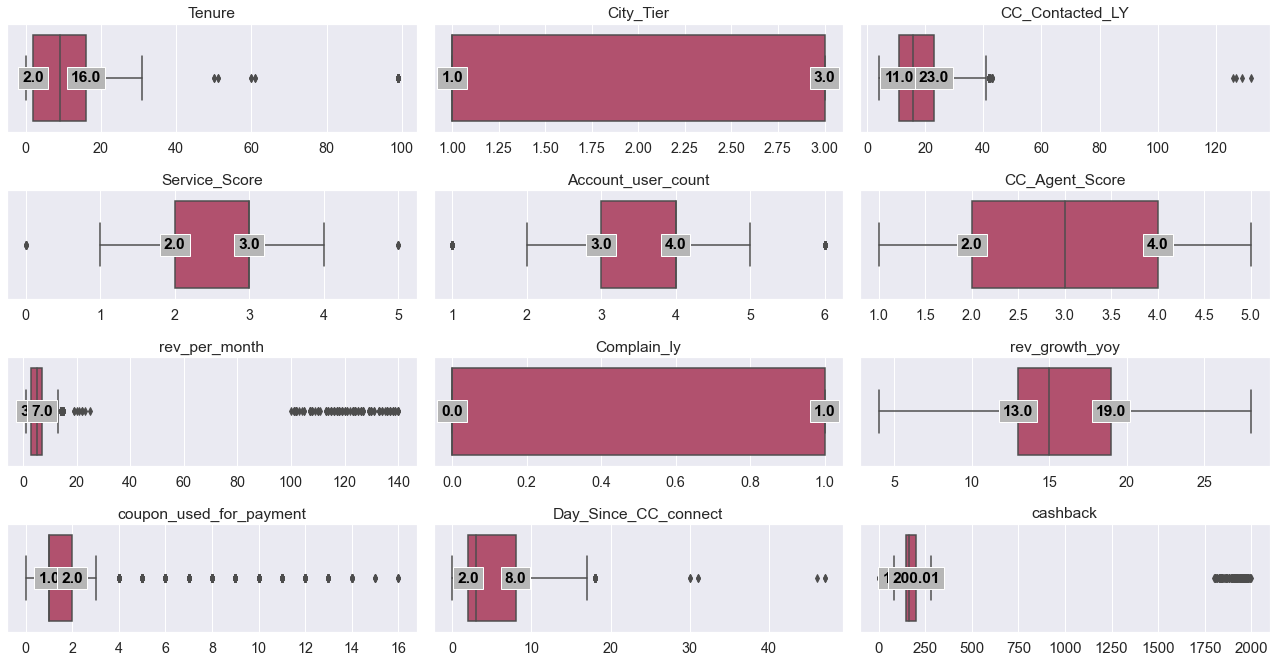

In [36]:
plt.figure(figsize=(18, 30))
sns.set(font_scale=1.3)
for i, variable in enumerate(numerical_columns):
    plt.subplot(13, 3, i + 1)
    q1 = churn[numerical_columns[i]].quantile(.25) # calculate the Q1 wich represents the 25%
    q3 = churn[numerical_columns[i]].quantile(.75) # calculate the Q1 wich represents the 75%
    mean = churn[numerical_columns[i]].mean()
    median = churn[numerical_columns[i]].median()
    mode = churn[numerical_columns[i]].mode()[0]
        
    sns.boxplot(churn[variable],palette='flare')     
    
    plt.text(x=q1,y=0,s=f'{q1:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))
    plt.text(x=q3,y=0,s=f'{q3:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))  
    
    plt.tight_layout()
    plt.ylabel("")
    plt.xlabel("")
    plt.title(variable)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Obsrevation

- There are upper outliers only in Tenure, CC Contacted LY, Rev per month, Coupon used for payment, Day Since CC connect, Cashback-Service Score, Cashback-Rev per month, Agent Score-Day Since CC connect and Tenure-Rev per month.

- Service Score, Account user count and Cashback have lower and upper outliers.

In [37]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) #np.clip limit the values in an array

    return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [38]:
churn_1 = churn.copy()
churn_outlier = treat_outliers_all(churn_1, numerical_columns)

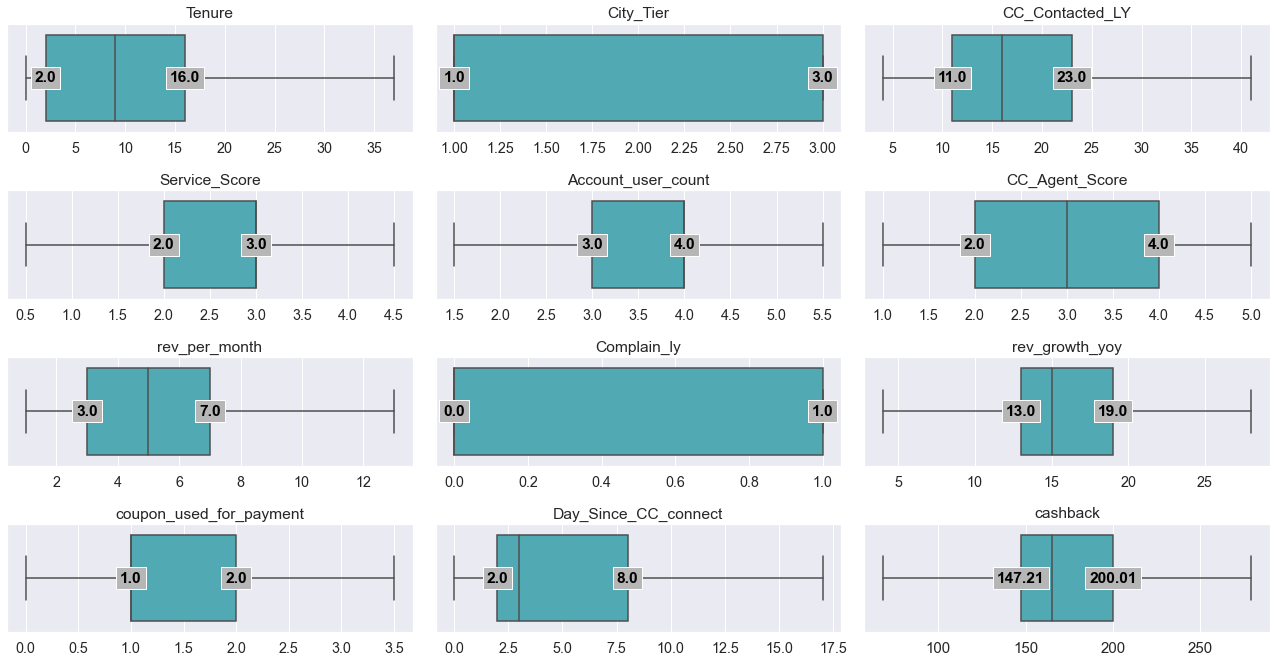

In [39]:
plt.figure(figsize=(18, 30))
sns.set(font_scale=1.3)
for i, variable in enumerate(numerical_columns):
    plt.subplot(13, 3, i + 1)
    q1 = churn_outlier[numerical_columns[i]].quantile(.25) # calculate the Q1 wich represents the 25%
    q3 = churn_outlier[numerical_columns[i]].quantile(.75) # calculate the Q1 wich represents the 75%
    mean = churn_outlier[numerical_columns[i]].mean()
    median = churn_outlier[numerical_columns[i]].median()
    mode = churn_outlier[numerical_columns[i]].mode()[0]
        
    sns.boxplot(churn_outlier[variable],palette='YlGnBu')     
    
    plt.text(x=q1,y=0,s=f'{q1:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))
    plt.text(x=q3,y=0,s=f'{q3:,}',ha='center',va='center',color='black',
                     weight='semibold',bbox=dict(facecolor='#B6B6B6'))  
    
    plt.tight_layout()
    plt.ylabel("")
    plt.xlabel("")
    plt.title(variable)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Missing Value Imputation & Label Encoding 

In [40]:
churn.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [41]:
churn_missing = churn.copy()

In [42]:
col_impute = ['rev_per_month','Login_device','cashback','Account_user_count','Day_Since_CC_connect',
'Complain_ly','Tenure','Marital_Status','CC_Agent_Score','City_Tier','Payment','Gender',
'CC_Contacted_LY','Service_Score','account_segment','rev_growth_yoy','coupon_used_for_payment']

In [43]:
np.random.seed(5)
churn_missing[col_impute].sample(10)

,rev_per_month,Login_device,cashback,Account_user_count,Day_Since_CC_connect,Complain_ly,Tenure,Marital_Status,CC_Agent_Score,City_Tier,Payment,Gender,CC_Contacted_LY,Service_Score,account_segment,rev_growth_yoy,coupon_used_for_payment
8558,5.0,Mobile,169.31,4.0,3.0,0.0,6.0,Divorced,4.0,3.0,Debit Card,Female,14.0,3.0,Regular Plus,13.0,2.0
9842,8.0,Mobile,186.54,4.0,4.0,1.0,18.0,Married,5.0,3.0,E wallet,Female,11.0,4.0,Super,24.0,2.0
6145,1.0,Computer,133.62,4.0,4.0,0.0,0.0,Divorced,2.0,1.0,Debit Card,Male,13.0,2.0,Regular Plus,19.0,0.0
111,8.0,Mobile,127.07,3.0,7.0,0.0,0.0,Divorced,5.0,1.0,Debit Card,Female,8.0,2.0,Regular Plus,20.0,1.0
5005,5.0,Computer,169.22,5.0,1.0,1.0,14.0,Married,1.0,1.0,Credit Card,Female,33.0,4.0,Super,14.0,1.0
7471,2.0,Mobile,140.47,3.0,2.0,0.0,0.0,Single,3.0,3.0,Cash on Delivery,Male,31.0,2.0,Regular Plus,12.0,0.0
3414,3.0,Mobile,168.77,5.0,3.0,0.0,1.0,Married,3.0,1.0,Credit Card,Female,24.0,3.0,Super,16.0,3.0
7316,NaN,NaN,220.10,NaN,9.0,1.0,11.0,Married,1.0,1.0,Debit Card,Male,25.0,3.0,HNI,14.0,2.0
10067,4.0,Mobile,NaN,2.0,8.0,1.0,12.0,Married,5.0,3.0,Credit Card,Female,21.0,3.0,Super,26.0,5.0
7694,6.0,Mobile,148.63,3.0,7.0,1.0,20.0,Single,1.0,3.0,Debit Card,Female,17.0,2.0,Super,17.0,1.0


In [44]:
# Identify categorical columns to encode them
col_categorical = ['Login_device','Marital_Status','Payment','Gender','account_segment']

In [45]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
for columnCtgImpt in col_categorical:
    print(churn_missing[columnCtgImpt].value_counts().sort_values(ascending=True))
    print("-" * 40)

Computer    3018
Mobile      7482
Name: Login_device, dtype: int64
----------------------------------------
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64
----------------------------------------
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64
----------------------------------------
Female    4448
Male      6704
Name: Gender, dtype: int64
----------------------------------------
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64
----------------------------------------


In [46]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
device = {
    'Computer': 0,
    'Mobile': 1
}
churn_missing["Login_device"] = churn_missing["Login_device"].map(device)

marital_status = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2
}
churn_missing["Marital_Status"] = churn_missing["Marital_Status"].map(marital_status)

Payment = {
    'UPI': 0,
    'Cash_on Delivery': 1,
    'E wallet': 2,
    'Credit Card': 3,
    'Debit Card': 4
}
churn_missing["Payment"] = churn_missing["Payment"].map(Payment)

Gender = {
    'Female': 0,
    'Male': 1
}
churn_missing["Gender"] = churn_missing["Gender"].map(Gender)

segment = {
    'Regular': 0,
    'Super_Plus': 1,
    'HNI': 2,
    'Super': 3,
    'Regular_Plus': 4
}
churn_missing["account_segment"] = churn_missing["account_segment"].map(segment)

In [47]:
np.random.seed(5)
churn_missing[col_impute].sample(10)

,rev_per_month,Login_device,cashback,Account_user_count,Day_Since_CC_connect,Complain_ly,Tenure,Marital_Status,CC_Agent_Score,City_Tier,Payment,Gender,CC_Contacted_LY,Service_Score,account_segment,rev_growth_yoy,coupon_used_for_payment
8558,5.0,1,169.31,4.0,3.0,0.0,6.0,2,4.0,3.0,4.0,0,14.0,3.0,NaN,13.0,2.0
9842,8.0,1,186.54,4.0,4.0,1.0,18.0,1,5.0,3.0,2.0,0,11.0,4.0,3.0,24.0,2.0
6145,1.0,0,133.62,4.0,4.0,0.0,0.0,2,2.0,1.0,4.0,1,13.0,2.0,NaN,19.0,0.0
111,8.0,1,127.07,3.0,7.0,0.0,0.0,2,5.0,1.0,4.0,0,8.0,2.0,NaN,20.0,1.0
5005,5.0,0,169.22,5.0,1.0,1.0,14.0,1,1.0,1.0,3.0,0,33.0,4.0,3.0,14.0,1.0
7471,2.0,1,140.47,3.0,2.0,0.0,0.0,0,3.0,3.0,NaN,1,31.0,2.0,NaN,12.0,0.0
3414,3.0,1,168.77,5.0,3.0,0.0,1.0,1,3.0,1.0,3.0,0,24.0,3.0,3.0,16.0,3.0
7316,NaN,NaN,220.10,NaN,9.0,1.0,11.0,1,1.0,1.0,4.0,1,25.0,3.0,2.0,14.0,2.0
10067,4.0,1,NaN,2.0,8.0,1.0,12.0,1,5.0,3.0,3.0,0,21.0,3.0,3.0,26.0,5.0
7694,6.0,1,148.63,3.0,7.0,1.0,20.0,0,1.0,3.0,4.0,0,17.0,2.0,3.0,17.0,1.0


In [48]:
# fill missing values with mode of the column values using SimpleImputer.
imputer = SimpleImputer(strategy='median', fill_value = 'numerical')

churn = imputer.fit_transform(churn_missing)  # override default behavior to replace Nan with Mode

In [49]:
 #The simple imputer returns a numpy array so we have to convert to a pandas dataframe.
churn =  pd.DataFrame(churn, columns = [['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']])

In [50]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.0,4.0,3.0,6.0,4.0,0.0,3.0,3.0,3.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,159.93,1.0
1,1.0,0.0,1.0,8.0,0.0,1.0,3.0,4.0,3.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,120.90,1.0
2,1.0,0.0,1.0,30.0,4.0,1.0,2.0,4.0,3.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,165.25,1.0
3,1.0,0.0,3.0,15.0,4.0,1.0,2.0,4.0,3.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.07,1.0
4,1.0,0.0,1.0,12.0,3.0,1.0,2.0,3.0,3.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,129.60,1.0


In [51]:
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### Addition of New Variable

In [52]:
# lets create a ratio variable between average monthly cashback on an account and monthly revenue generated by same account.
for i, j in zip(churn['cashback'], churn['rev_per_month']):
    churn['Avg_Mnth_cashback_per_rev'] = (churn['cashback'][i])/(churn['rev_per_month'][j])

In [53]:
# lets view the ratios to see what the data is telling us
churn['Avg_Mnth_cashback_per_rev'].head()

,Avg_Mnth_cashback_per_rev
0,17.770000
1,17.271429
2,27.541667
3,16.758750
4,43.200000


In [54]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Avg_Mnth_cashback_per_rev
0,1.0,4.0,3.0,6.0,4.0,0.0,3.0,3.0,3.0,2.0,0.0,9.0,1.0,11.0,1.0,5.0,159.93,1.0,17.770000
1,1.0,0.0,1.0,8.0,0.0,1.0,3.0,4.0,3.0,3.0,0.0,7.0,1.0,15.0,0.0,0.0,120.90,1.0,17.271429
2,1.0,0.0,1.0,30.0,4.0,1.0,2.0,4.0,3.0,3.0,0.0,6.0,1.0,14.0,0.0,3.0,165.25,1.0,27.541667
3,1.0,0.0,3.0,15.0,4.0,1.0,2.0,4.0,3.0,5.0,0.0,8.0,0.0,23.0,0.0,3.0,134.07,1.0,16.758750
4,1.0,0.0,1.0,12.0,3.0,1.0,2.0,3.0,3.0,5.0,0.0,3.0,0.0,11.0,1.0,3.0,129.60,1.0,43.200000


### EDA

#### Correlation plot

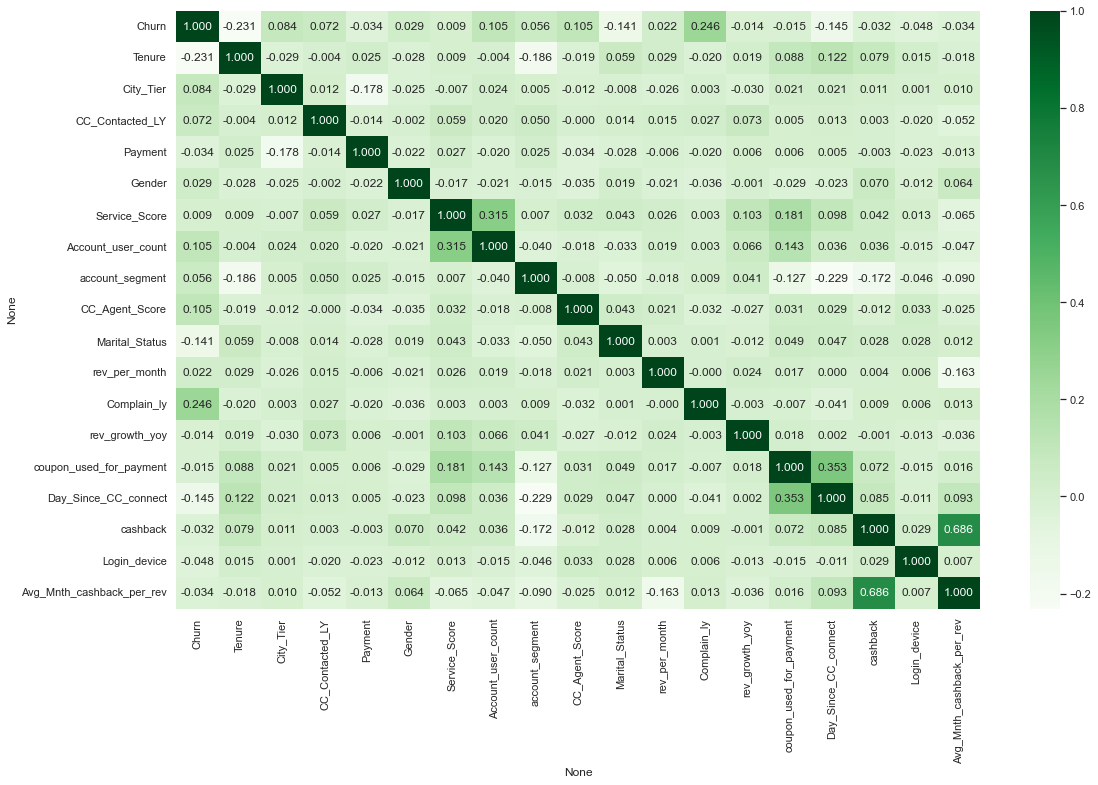

In [55]:
plt.figure(figsize=(18,11))
sns.set(font_scale=1)
sns.heatmap(churn.corr(), cmap="Greens" ,annot=True, fmt='.3f');

#### Observations

- There is a correlation between cashback & Avg_Mnth_cashback_per_rev.

### Model Building

#### Evaluation Criterion


Positive: Customers that did churn [1]

Negative: Customers that did not churn [0]

Recall - To maximize recall and predict better those who will churn.

1.0 True Positives TP: Customer predicted as Positive (that they will churn) and correctly because they did churn.

2.0 False Positives FP: Customer predicted as Positive (will churn) but falsely because they did NOT churn.

3.0 False Negatives FN: Customer predicted as Negative (will NOT churn) but falsely because they did churn.

4.0 True Negatives TN: Customer predicted as Negative (will NOT churn) and correctly because they did NOT churn.

## Spliting Data into Train & Test

In [56]:
# Lets split the data
X = churn.drop('Churn', axis=1)
y = churn.pop("Churn") 

In [57]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True, stratify=y)
print(X_train.shape, X_test.shape)

(7882, 18) (3378, 18)


In [58]:
#lets check if stratify is actually true after split by comparing ratios of both classes in the target before & after the split
print(y.value_counts())
print(y_test.value_counts())

(Churn,)
0.0         9364
1.0         1896
dtype: int64
(Churn,)
0.0         2809
1.0          569
dtype: int64


#### Confusion Matrix code

In [59]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [61]:
X.T.head()

,0,1,2,3,4,5,6,7,8,9,...,11250,11251,11252,11253,11254,11255,11256,11257,11258,11259
Tenure,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,0.0,...,3.0,14.0,13.0,5.0,1.0,10.0,13.0,1.0,23.0,8.0
City_Tier,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0,...,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0
CC_Contacted_LY,6.0,8.0,30.0,15.0,12.0,22.0,11.0,6.0,9.0,31.0,...,40.0,37.0,33.0,17.0,19.0,34.0,19.0,14.0,11.0,22.0
Payment,4.0,0.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,4.0,...,3.0,2.0,2.0,3.0,0.0,3.0,3.0,4.0,3.0,3.0
Gender,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


#### Modelling Process, Validation against Test data, & Interpretation


We shall hyper-parameter tune models we plan to build in one-step instead of building the model and then paramter tuning in another model. This is intended to avoid having too many models built.

We shall use the more exhaustive Grid Search Cross Validation instead of the quick Randomized Search Cross Validation.

#### Decision Tree Classifier with Hyper-Parameter tuning

Accuracy on training set :  0.8806140573458513
Accuracy on test set :  0.8735938425103612
Recall on training set :  0.760361718161266
Recall on test set :  0.718804920913884
Precision on training set :  0.6182598039215687
Precision on test set :  0.6050295857988166
F1-Score on training set :  0.6819871578235891
F1-Score on test set :  0.6570281124497993
Wall time: 47 s


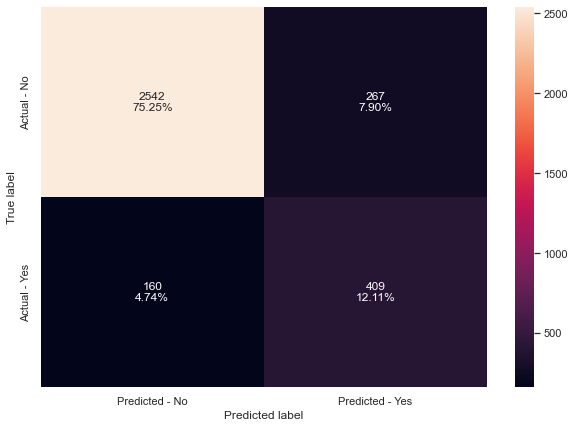

In [62]:
%%time
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.30,1:0.70},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. (Actual modeling)
dtree_estimator.fit(X_train, y_train)

# Comparing with test data (the Validation)
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

VALIDATION : 

From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the Recall on the test data is 71.88%. Recall is our primary Performance metric of interest as stated earlier in our model objectives.

It is not so effective in predicting False Negatives which are harmful, allowing slip through 160 churners incorrectly predicted as 'Not going to churn'.

In [63]:
## Important Variables

print (pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Tenure                     0.701742
Complain_ly                0.091069
Day_Since_CC_connect       0.059623
CC_Agent_Score             0.039313
Marital_Status             0.035558
rev_per_month              0.025874
City_Tier                  0.023439
Avg_Mnth_cashback_per_rev  0.023383
Service_Score              0.000000
Account_user_count         0.000000
account_segment            0.000000
Gender                     0.000000
Payment                    0.000000
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
CC_Contacted_LY            0.000000
cashback                   0.000000
Login_device               0.000000


### Random Forest with Hyper-parameter tuning

In [64]:
%%time
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.30,1:0.70},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,25,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,10,5),
                'min_samples_split': np.arange(2, 15, 5),
                'n_estimators': np.arange(20,70,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

Wall time: 3min 22s


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=20,
                       max_features=None, min_samples_split=7, n_estimators=60,
                       oob_score=True, random_state=1)

Accuracy on training set :  0.9961938594265415
Accuracy on test set :  0.9532267613972765
Recall on training set :  0.9886963074604371
Recall on test set :  0.8154657293497364
Precision on training set :  0.9886963074604371
Precision on test set :  0.8974854932301741
F1-Score on training set :  0.9886963074604371
F1-Score on test set :  0.85451197053407


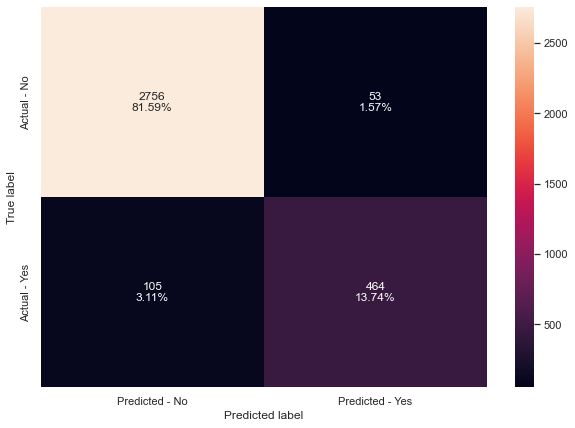

In [65]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

VALIDATION :

From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the Recall on the test data is 81.54%. Recall is our primary Performance metric of interest as stated earlier in our model objectives.

It is a bit effective in predicting False Negatives which are harmful, allowing slip through 105 churners incorrectly predicted as 'Not going to churn'. This performed better than the decision tree model which let slip through 146 potential churners incorrectly classified as not going to churn.

We used class weights of ratio 30:70 % for 0s and 1s respectively to make the model more sensitive to predicting 1s correctly.

In [66]:
feature_names = list(X.columns)
print(feature_names)

[('Tenure',), ('City_Tier',), ('CC_Contacted_LY',), ('Payment',), ('Gender',), ('Service_Score',), ('Account_user_count',), ('account_segment',), ('CC_Agent_Score',), ('Marital_Status',), ('rev_per_month',), ('Complain_ly',), ('rev_growth_yoy',), ('coupon_used_for_payment',), ('Day_Since_CC_connect',), ('cashback',), ('Login_device',), ('Avg_Mnth_cashback_per_rev',)]


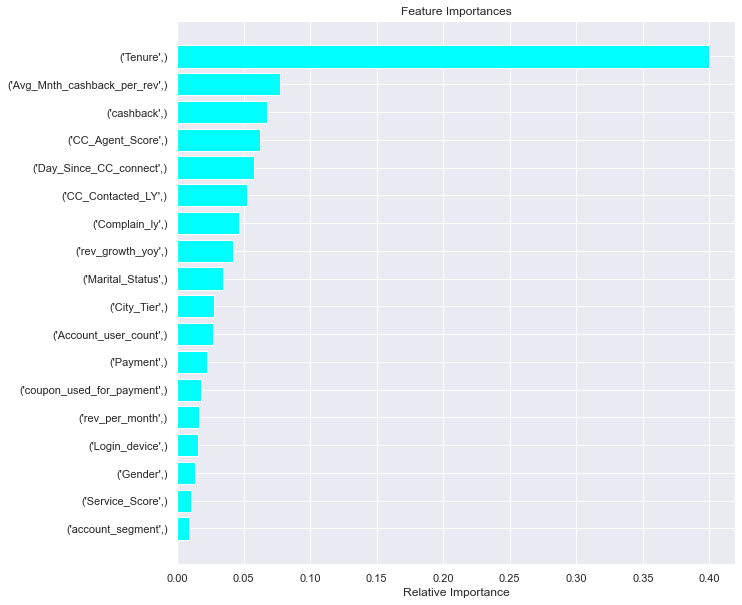

In [67]:
importances_2 = rf_tuned.feature_importances_
indices = np.argsort(importances_2)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_2[indices], color='cyan', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Gradient Boosting with Hyper-parameter tuning

In [68]:
%%time
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

Wall time: 2min 7s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=60, random_state=1,
                           subsample=0.8)

In [69]:
# lets view the set of possible available parameters for tuning in Gradient Boosting algorithm.
gbc_tuned.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init__algorithm', 'init__base_estimator', 'init__learning_rate', 'init__n_estimators', 'init__random_state', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Accuracy on training set :  0.9064958132453692
Accuracy on test set :  0.9026050917702783
Recall on training set :  0.5749811605124341
Recall on test set :  0.5448154657293497
Precision on training set :  0.8151709401709402
Precision on test set :  0.8157894736842105
F1-Score on training set :  0.6743261157755193
F1-Score on test set :  0.6533192834562697


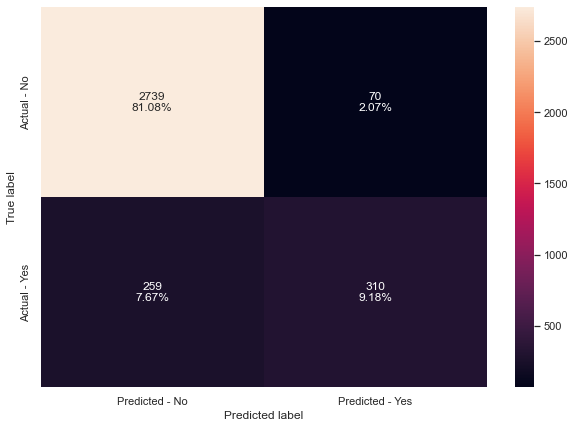

In [70]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

VALIDATION :

From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the Recall on the test data is 54.48%.

It is poor at predicting False Negatives which are harmful, allowing slip through 259 churners incorrectly predicted as 'Not going to churn'. This performed much worse than the Random Forest model which let slip through only 70 potential churners incorrectly classified as not going to churn.

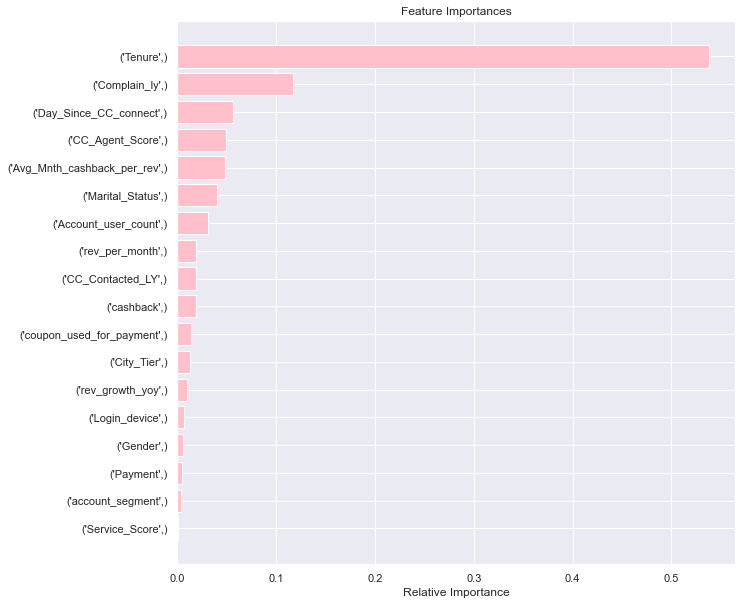

In [71]:
importances_3 = gbc_tuned.feature_importances_
indices = np.argsort(importances_3)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_3[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Logistic Regression

In [72]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.157158  0.233596  0.026697 -0.017076  0.271198 -0.091514  0.325235   

          7         8        9        10        11        12        13  \
0 -0.412969  0.266074 -0.61874  0.005554  1.507162 -0.026724  0.108287   

         14        15        16        17  intercept  
0 -0.119803  0.000817 -0.427175 -0.004757   -1.18063  


Accuracy on training set :  0.8818827708703375
Accuracy on test set :  0.8827708703374778
Recall on training set :  0.40994724943481536
Recall on test set :  0.4024604569420035
Precision on training set :  0.7861271676300579
Precision on test set :  0.8035087719298246
F1-Score on training set :  0.5388806339772165
F1-Score on test set :  0.5362997658079625


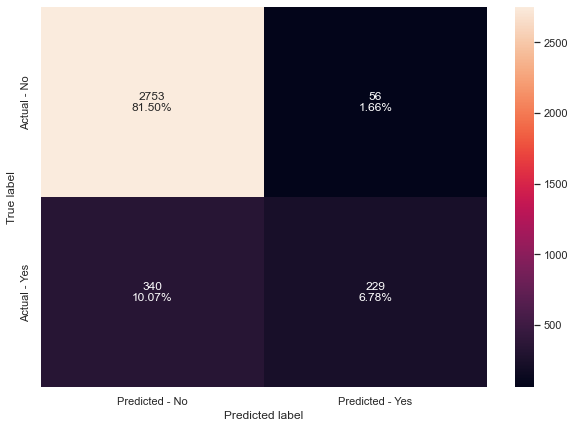

In [73]:
#Calculating different metrics
get_metrics_score(model)

#Creating confusion matrix
make_confusion_matrix(model,y_test)

VALIDATION:
    
The Logistic Regression has a poor Recall and is not efficient at predicting False Negatives which impact the Customer Churn the most.

It has a high number of incorrectly predicted negatives, thus people who actually churned but were labeled as Not going to churn. A high FN of 340 and leading to a poor test Recall of 40.2%.

### XGBoost with Hyper-parameter tuning

In [74]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    'n_estimators': np.arange(20,70,10),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,1],
    "learning_rate":[0.1,0.2],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Wall time: 2min 58s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=60, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Accuracy on training set :  0.9729764019284446
Accuracy on test set :  0.9402013025458852
Recall on training set :  0.9917106254709872
Recall on test set :  0.8910369068541301
Precision on training set :  0.8669301712779973
Precision on test set :  0.7836166924265843
F1-Score on training set :  0.9251318101933217
F1-Score on test set :  0.8338815789473685


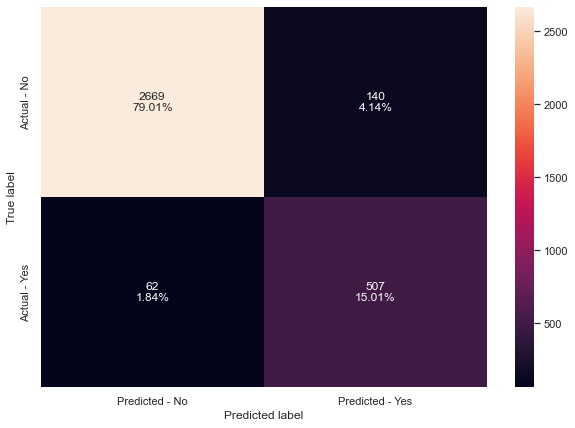

In [75]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

VALIDATION :

From the validation against the test data using the get_metrics_score() function earlier defined, we can see that the Recall on the test data is 89.1%. 

It is very effective at predicting False Negatives which are harmful, allowing slip through only 62 potential churners incorrectly predicted as 'Not going to churn'. This performance is the best so far compared to all the other earlier tested models so far.

In [78]:
# lets view the set of possible available parameters for tuning in XGBoost algorithm.
xgb_tuned.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity', 'eval_metric'])

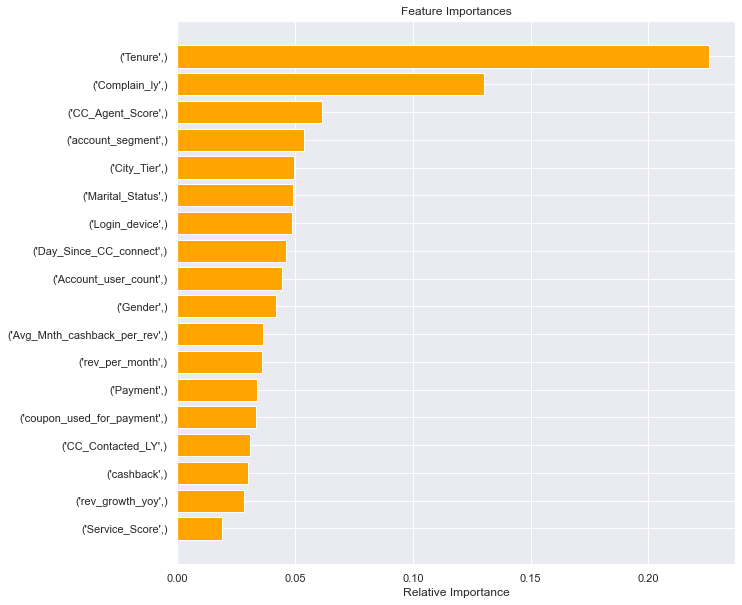

In [79]:
importances_4 = xgb_tuned.feature_importances_
indices = np.argsort(importances_4)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_4[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparison of Model performance (Table and Confusion Matrix analysis)

In [76]:
# defining list of models
models = [dtree_estimator,rf_tuned, gbc_tuned, model,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for algorithm in models:
    
    j = get_metrics_score(algorithm,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [77]:
comparison_frame = pd.DataFrame({'Model_Algorithm':['Tuned Decision Tree','Tuned Random Forest','Tuned Gradient Boosting Classifier',
                                                     'Logistic Regression','Tuned XGBoost'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test, 
                                         'False_Negatives_FN':[160,105,259,340,62]}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model_Algorithm,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score,False_Negatives_FN
4,Tuned XGBoost,0.972976,0.940201,0.991711,0.891037,0.866930,0.783617,0.925132,0.833882,62
1,Tuned Random Forest,0.996194,0.953227,0.988696,0.815466,0.988696,0.897485,0.988696,0.854512,105
0,Tuned Decision Tree,0.880614,0.873594,0.760362,0.718805,0.618260,0.605030,0.681987,0.657028,160
2,Tuned Gradient Boosting Classifier,0.906496,0.902605,0.574981,0.544815,0.815171,0.815789,0.674326,0.653319,259
3,Logistic Regression,0.881883,0.882771,0.409947,0.402460,0.786127,0.803509,0.538881,0.536300,340


### Interpretation from the best model 

From the comparision table we can observe that for Tuned Random Forest the Recall for Test set is compartively high but when studying the train & test set recall results of tuned RF , we can notice that model is overfitting.

Hence the Best model is Tuned XG Boost with train recall as 99.7% & Test recall as 89.103%. We can still improve Recall rate by building different models & tuining them with multiple iterations.

### Conclusion


Based on our analysis, we can conclude the following features are the most important to predict if the customer is going to churn or not:

- Tenure

- Complain in last 12 months

- Day since connected & 

- CC Agent score

The profile of the accounts that have churned:

Primary information to look at:

* Tenure - Accounts with more than 5 years of tenure is not very likely to churn.
* Complain_ly - It is more likely that customers who have complained are facing some issue and they might churn in the future.

Secondary information to look at:

* Cashback - Customers who are not getting the cashback offers and paying more for the service are more likely to churn.
* CC_Contacted_LY - Customers not who rated the customer service and account service less than 4 might churn.

### Recommendations

**Account segment "Super"**

Accounts that are not labeled as Super are highly likely to churn. “Super” is the account segment most common in the company. About 36% of accounts belong to this segment. These customers very loyal to the company. The company needs to add more customers to this segment. Adding more customers to the segment will lead to lower churn in the future.

**Tenure**

Accounts with lower tenure are more likely to churn than accounts with higher tenure. Again, customers that have a year or less of tenure should be provided high, prioritized customer service.

**Marital Status "Married"**

Accounts whose main holder is married are less likely to churn than accounts whose main holder is not married. Perhaps accounts with married status are in a more “stable” phase in the customer lifetime, than accounts that do not have the “married” status. Perhaps accounts with “single” status are in a stage that revolves around growth and risk. These customers are willing to take the risk of going to another competing company. The company will require a service plan that includes promoting stability and growth for account holders that are single and divorced.

**Payment Method "E Wallet"**

Accounts that use payment method E wallet are more likely to churn than accounts that do not use this payment method. The company will need to identify if the service experience regarding payment with E wallet are relatively lower than service experience with other payment methods. Perhaps customers that use E wallet are expecting a specific service experience that cannot be currently provided by the company.

Based on the above observations, it is recommended that the company should provide some better offer/service to the customers who have opted for the service in the last 5 years. 